In [1]:
#from matplotlib import image
import numpy 
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.neighbors import KDTree
import networkx as nx
nx.__version__ # should be 2.1
from shapely.geometry import Polygon, Point, LineString, LinearRing, MultiPolygon
import numpy.linalg as LA
from queue import PriorityQueue
import csv

In [2]:
import DDAE_library as ddae

In [12]:
rng = numpy.random.default_rng()
sample=rng.integers(0, 250)
#Read map
img_map=image.imread('64x64_validation250_v2/map'+str(sample)+'.png');
#Read numpy tiny_map from skelUnet results
skeleton_map=numpy.load('skelUnet_results/as_numpy_array/b1xp0_'+str(sample)+'_9000.npy')

#Read polygon
all_polygons=numpy.load('polygons/polygon_m'+str(sample)+'.npy',allow_pickle=True)
polygon_list=[]
for p in all_polygons:
    polygon_list.append(Polygon(p))

vertex=ddae.get_vertices(skeleton_map)
nodes=ddae.sample_vertices(vertex,int(len(vertex)))
g=ddae.graph(nodes,polygon_list) 

#Get the query points
m_tree=KDTree(numpy.array(nodes))

start=ddae.random_map_point(img_map)
add,g =ddae.add_to_graph(g,m_tree,start,nodes,polygon_list)
while add==False:
    start=ddae.random_map_point(img_map)
    add,g =ddae.add_to_graph(g,m_tree,start,nodes,polygon_list)

goal=ddae.random_map_point(img_map)
add,g =ddae.add_to_graph(g,m_tree,goal,nodes,polygon_list)
while add==False:
    goal=ddae.random_map_point(img_map)
    add,g =ddae.add_to_graph(g,m_tree,goal,nodes,polygon_list)


query=(start,goal)
print('q',query)

#Find a path
start=tuple(start)
goal=tuple(goal)
path, cost = ddae.a_star(g, ddae.heuristic, start, goal)
path_pairs = zip(path[:-1], path[1:])


q (array([29, 51]), array([19,  1]))


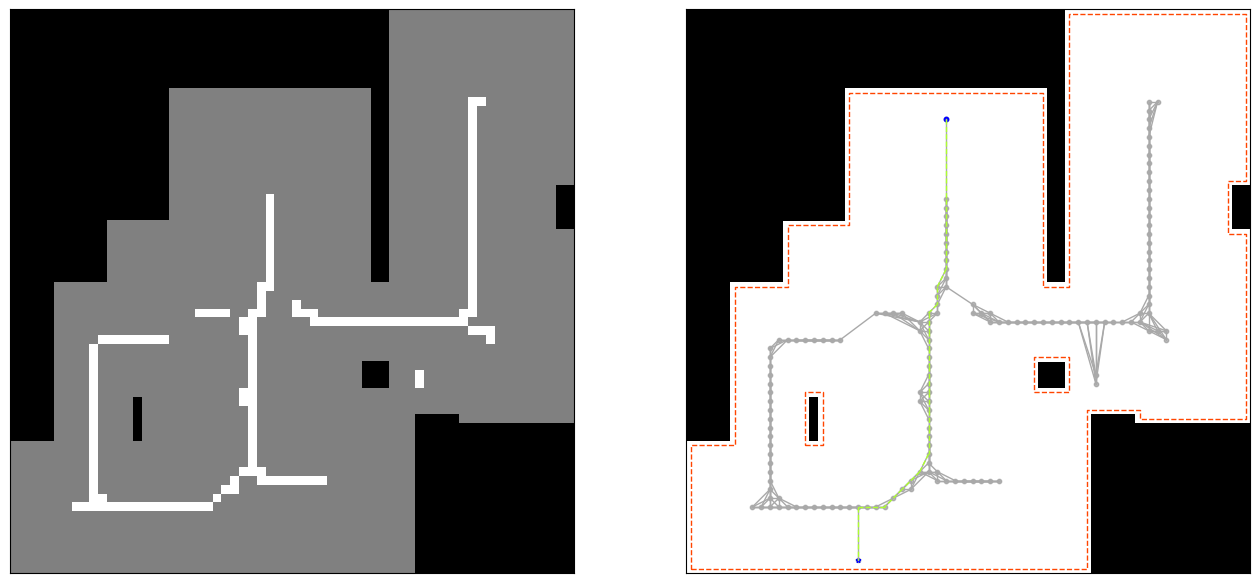

In [13]:

fig,ax=plt.subplots(1,2,figsize=(16,16))

ax[0].tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    left=False,      
    right=False,         
    labelbottom=False,
    labelleft=False, 
    labelright=False) 

ax[1].tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    left=False,      
    right=False,         
    labelbottom=False,
    labelleft=False, 
    labelright=False) 


img_map_rot = img_map[::-1, ::-1]
skeleton_map_rot = skeleton_map[::-1, ::-1]
ax[0].imshow(numpy.fliplr(img_map_rot),cmap='binary')
ax[0].imshow(numpy.fliplr(skeleton_map_rot),cmap='binary', alpha=0.5)

ax[1].imshow(img_map,cmap='binary',origin='lower')
# draw nodes
for i in g.nodes:
    ax[1].scatter(i[0],i[1], color='gray',alpha=0.5,s=10, marker='o')    
# draw edges
for (n1, n2) in g.edges: #g2.edges
    ax[1].plot([n1[0], n2[0]], [n1[1], n2[1]],'darkgray' , alpha=1.0, linewidth='1.0')
    
path_pairs = zip(path[:-1], path[1:])
for (n1, n2) in path_pairs:
    ax[1].plot([n1[0], n2[0]],[n1[1], n2[1]], color='greenyellow', linewidth=1.0,alpha=1.0,linestyle='--')
    
# draw start point
ax[1].scatter(start[0],start[1], color='blue',alpha=1.0,s=10,marker='o')
# draw goal point
ax[1].scatter(goal[0],goal[1], color='blue',alpha=1.0,s=10,marker='*')


for p in all_polygons:
    x_data=[]
    y_data=[]
    for i in p:
        x_data.append(i[1])#change i[0] to i[1] in 270922 
        y_data.append(i[0])
    ax[1].plot(x_data,y_data, linewidth=1.0, color='orangered',linestyle="--")



plt.show()